## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras import optimizers


# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()

optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 20ms/step - loss: 1.8637 - accuracy: 0.3324 - val_loss: 1.7272 - val_accuracy: 0.3776
Epoch 2/500
196/196 [==============================] - 3s 18ms/step - loss: 1.6446 - accuracy: 0.4155 - val_loss: 1.6963 - val_accuracy: 0.3977
Epoch 3/500
196/196 [==============================] - 4s 18ms/step - loss: 1.5557 - accuracy: 0.4471 - val_loss: 1.6137 - val_accuracy: 0.4270
Epoch 4/500
196/196 [==============================] - 4s 18ms/step - loss: 1.4939 - accuracy: 0.4704 - val_loss: 1.5366 - val_accuracy: 0.4548
Epoch 5/500
196/196 [==============================] - 4s 19ms/step - loss: 1.4454 - accuracy: 0.4839 - val_loss: 1.4681 - val_accuracy: 0.4705
Epoch 6/500
196/196 [==============================] - 4s 19ms/step - loss: 1.4032 - accuracy: 0.5003 - val_loss: 1.5244 - val_accuracy: 0.4559
Epoch 7/500
196/196 [==============================] - 4s 19ms/step - loss: 1.3666 - accuracy: 0.5134 - val_loss: 1.4935 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 0.3344 - accuracy: 0.8820 - val_loss: 2.4602 - val_accuracy: 0.4929
Epoch 58/500
196/196 [==============================] - 4s 20ms/step - loss: 0.3227 - accuracy: 0.8879 - val_loss: 2.1691 - val_accuracy: 0.5293
Epoch 59/500
196/196 [==============================] - 4s 19ms/step - loss: 0.3111 - accuracy: 0.8913 - val_loss: 2.3955 - val_accuracy: 0.5115
Epoch 60/500
196/196 [==============================] - 4s 20ms/step - loss: 0.2919 - accuracy: 0.8969 - val_loss: 2.4383 - val_accuracy: 0.5169
Epoch 61/500
196/196 [==============================] - 4s 20ms/step - loss: 0.2891 - accuracy: 0.8985 - val_loss: 2.4339 - val_accuracy: 0.5090
Epoch 62/500
196/196 [==============================] - 4s 20ms/step - loss: 0.2776 - accuracy: 0.9027 - val_loss: 2.3305 - val_accuracy: 0.5258
Epoch 63/500
196/196 [==============================] - 4s 20ms/step - loss: 0.2688 - accuracy: 0.9060 - val_loss: 2.3825 - val_accuracy: 0.524

196/196 [==============================] - 4s 21ms/step - loss: 0.0790 - accuracy: 0.9727 - val_loss: 3.9333 - val_accuracy: 0.5273
Epoch 114/500
196/196 [==============================] - 4s 21ms/step - loss: 0.0781 - accuracy: 0.9730 - val_loss: 4.1778 - val_accuracy: 0.5163
Epoch 115/500
196/196 [==============================] - 4s 20ms/step - loss: 0.1129 - accuracy: 0.9606 - val_loss: 3.8416 - val_accuracy: 0.5311
Epoch 116/500
196/196 [==============================] - 4s 20ms/step - loss: 0.0949 - accuracy: 0.9675 - val_loss: 3.9586 - val_accuracy: 0.5272
Epoch 117/500
196/196 [==============================] - 4s 20ms/step - loss: 0.0889 - accuracy: 0.9690 - val_loss: 4.0287 - val_accuracy: 0.5241
Epoch 118/500
196/196 [==============================] - 4s 20ms/step - loss: 0.0992 - accuracy: 0.9652 - val_loss: 4.1614 - val_accuracy: 0.5190
Epoch 119/500
196/196 [==============================] - 4s 20ms/step - loss: 0.0848 - accuracy: 0.9704 - val_loss: 4.2261 - val_accuracy:

Epoch 169/500
196/196 [==============================] - 4s 20ms/step - loss: 4.5931e-04 - accuracy: 1.0000 - val_loss: 4.8005 - val_accuracy: 0.5459
Epoch 170/500
196/196 [==============================] - 4s 20ms/step - loss: 4.6718e-04 - accuracy: 1.0000 - val_loss: 4.8102 - val_accuracy: 0.5441
Epoch 171/500
196/196 [==============================] - 4s 20ms/step - loss: 4.3931e-04 - accuracy: 1.0000 - val_loss: 4.8135 - val_accuracy: 0.5463
Epoch 172/500
196/196 [==============================] - 4s 20ms/step - loss: 4.2900e-04 - accuracy: 1.0000 - val_loss: 4.8127 - val_accuracy: 0.5455
Epoch 173/500
196/196 [==============================] - 4s 20ms/step - loss: 4.3183e-04 - accuracy: 1.0000 - val_loss: 4.8266 - val_accuracy: 0.5465
Epoch 174/500
196/196 [==============================] - 4s 20ms/step - loss: 4.1841e-04 - accuracy: 1.0000 - val_loss: 4.8273 - val_accuracy: 0.5455
Epoch 175/500
196/196 [==============================] - 4s 21ms/step - loss: 4.1074e-04 - accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 2.3927e-04 - accuracy: 1.0000 - val_loss: 5.0069 - val_accuracy: 0.5456
Epoch 224/500
196/196 [==============================] - 4s 20ms/step - loss: 2.3691e-04 - accuracy: 1.0000 - val_loss: 5.0109 - val_accuracy: 0.5465
Epoch 225/500
196/196 [==============================] - 4s 20ms/step - loss: 2.3777e-04 - accuracy: 1.0000 - val_loss: 5.0118 - val_accuracy: 0.5467
Epoch 226/500
196/196 [==============================] - 4s 21ms/step - loss: 2.3498e-04 - accuracy: 1.0000 - val_loss: 5.0121 - val_accuracy: 0.5467
Epoch 227/500
196/196 [==============================] - 4s 21ms/step - loss: 2.3265e-04 - accuracy: 1.0000 - val_loss: 5.0135 - val_accuracy: 0.5463
Epoch 228/500
196/196 [==============================] - 4s 20ms/step - loss: 2.3041e-04 - accuracy: 1.0000 - val_loss: 5.0167 - val_accuracy: 0.5469
Epoch 229/500
196/196 [==============================] - 4s 21ms/step - loss: 2.2978e-04 - accuracy: 1.0000 - val_

Epoch 278/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6710e-04 - accuracy: 1.0000 - val_loss: 5.1259 - val_accuracy: 0.5463
Epoch 279/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6721e-04 - accuracy: 1.0000 - val_loss: 5.1280 - val_accuracy: 0.5469
Epoch 280/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6594e-04 - accuracy: 1.0000 - val_loss: 5.1296 - val_accuracy: 0.5466
Epoch 281/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6440e-04 - accuracy: 1.0000 - val_loss: 5.1338 - val_accuracy: 0.5474
Epoch 282/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6386e-04 - accuracy: 1.0000 - val_loss: 5.1354 - val_accuracy: 0.5465
Epoch 283/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6243e-04 - accuracy: 1.0000 - val_loss: 5.1363 - val_accuracy: 0.5464
Epoch 284/500
196/196 [==============================] - 4s 21ms/step - loss: 1.6291e-04 - accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 1.3019e-04 - accuracy: 1.0000 - val_loss: 5.2179 - val_accuracy: 0.5466
Epoch 333/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2948e-04 - accuracy: 1.0000 - val_loss: 5.2191 - val_accuracy: 0.5464
Epoch 334/500
196/196 [==============================] - 4s 23ms/step - loss: 1.2890e-04 - accuracy: 1.0000 - val_loss: 5.2217 - val_accuracy: 0.5471
Epoch 335/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2853e-04 - accuracy: 1.0000 - val_loss: 5.2209 - val_accuracy: 0.5469
Epoch 336/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2755e-04 - accuracy: 1.0000 - val_loss: 5.2243 - val_accuracy: 0.5459
Epoch 337/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2748e-04 - accuracy: 1.0000 - val_loss: 5.2264 - val_accuracy: 0.5467
Epoch 338/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2706e-04 - accuracy: 1.0000 - val_

Epoch 387/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0620e-04 - accuracy: 1.0000 - val_loss: 5.2935 - val_accuracy: 0.5458
Epoch 388/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0613e-04 - accuracy: 1.0000 - val_loss: 5.2930 - val_accuracy: 0.5459
Epoch 389/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0561e-04 - accuracy: 1.0000 - val_loss: 5.2948 - val_accuracy: 0.5458
Epoch 390/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0496e-04 - accuracy: 1.0000 - val_loss: 5.2951 - val_accuracy: 0.5461
Epoch 391/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0477e-04 - accuracy: 1.0000 - val_loss: 5.2961 - val_accuracy: 0.5462
Epoch 392/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0416e-04 - accuracy: 1.0000 - val_loss: 5.2989 - val_accuracy: 0.5460
Epoch 393/500
196/196 [==============================] - 4s 21ms/step - loss: 1.0424e-04 - accuracy:

196/196 [==============================] - 4s 21ms/step - loss: 9.0284e-05 - accuracy: 1.0000 - val_loss: 5.3518 - val_accuracy: 0.5464
Epoch 442/500
196/196 [==============================] - 5s 27ms/step - loss: 9.0145e-05 - accuracy: 1.0000 - val_loss: 5.3553 - val_accuracy: 0.5468
Epoch 443/500
196/196 [==============================] - 4s 23ms/step - loss: 8.9864e-05 - accuracy: 1.0000 - val_loss: 5.3543 - val_accuracy: 0.5458
Epoch 444/500
196/196 [==============================] - 4s 22ms/step - loss: 8.9493e-05 - accuracy: 1.0000 - val_loss: 5.3566 - val_accuracy: 0.5461
Epoch 445/500
196/196 [==============================] - 4s 23ms/step - loss: 8.9416e-05 - accuracy: 1.0000 - val_loss: 5.3573 - val_accuracy: 0.5469
Epoch 446/500
196/196 [==============================] - 5s 25ms/step - loss: 8.9258e-05 - accuracy: 1.0000 - val_loss: 5.3568 - val_accuracy: 0.5464
Epoch 447/500
196/196 [==============================] - 5s 25ms/step - loss: 8.8773e-05 - accuracy: 1.0000 - val_

Epoch 496/500
196/196 [==============================] - 4s 20ms/step - loss: 7.8346e-05 - accuracy: 1.0000 - val_loss: 5.4050 - val_accuracy: 0.5464
Epoch 497/500
196/196 [==============================] - 4s 20ms/step - loss: 7.8211e-05 - accuracy: 1.0000 - val_loss: 5.4070 - val_accuracy: 0.5456
Epoch 498/500
196/196 [==============================] - 4s 20ms/step - loss: 7.7900e-05 - accuracy: 1.0000 - val_loss: 5.4079 - val_accuracy: 0.5461
Epoch 499/500
196/196 [==============================] - 4s 20ms/step - loss: 7.8466e-05 - accuracy: 1.0000 - val_loss: 5.4089 - val_accuracy: 0.5462
Epoch 500/500
196/196 [==============================] - 4s 20ms/step - loss: 7.7630e-05 - accuracy: 1.0000 - val_loss: 5.4104 - val_accuracy: 0.5460


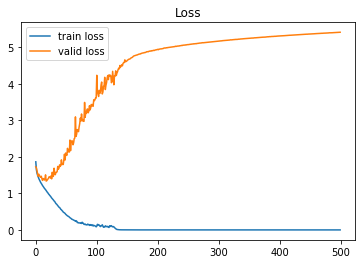

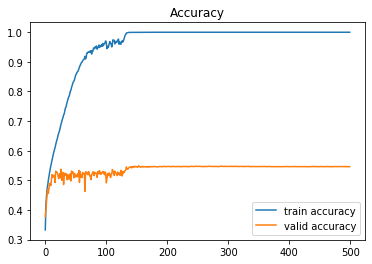

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()